In [1]:
#import libruaries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('Chevron Oil(Max).csv')
df.head()

Date  Open      High       Low     Close  Adj Close  Volume
0  1962-01-02   0.0  3.296131  3.244048  3.296131   0.369684  105840
1  1962-01-03   0.0  3.303571  3.273810  3.288690   0.368849  127680
2  1962-01-04   0.0  3.288690  3.258929  3.258929   0.365512   75600
3  1962-01-05   0.0  3.266369  3.177083  3.177083   0.356332  201600
4  1962-01-08   0.0  3.191964  3.139881  3.162202   0.354663  126000

In [3]:
df.shape

(15062, 7)

In [4]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
15057  2021-10-25  113.529999  114.349998  113.300003  113.849998  113.849998   
15058  2021-10-26  113.980003  114.599998  113.510002  114.099998  114.099998   
15059  2021-10-27  113.220001  113.580002  111.650002  112.070000  112.070000   
15060  2021-10-28  111.580002  113.269997  111.580002  113.120003  113.120003   
15061  2021-10-29  114.830002  115.290001  113.150002  114.489998  114.489998   

         Volume  
15057   9579800  
15058   7463000  
15059   9096100  
15060   7538200  
15061  15291800

In [5]:
2021-1962

59

In [6]:
59*12

708

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15062 entries, 0 to 15061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15062 non-null  object 
 1   Open       15062 non-null  float64
 2   High       15062 non-null  float64
 3   Low        15062 non-null  float64
 4   Close      15062 non-null  float64
 5   Adj Close  15062 non-null  float64
 6   Volume     15062 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 823.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

Date  Open      High       Low     Close  Adj Close  Volume
0 1962-01-02   0.0  3.296131  3.244048  3.296131   0.369684  105840
1 1962-01-03   0.0  3.303571  3.273810  3.288690   0.368849  127680
2 1962-01-04   0.0  3.288690  3.258929  3.258929   0.365512   75600
3 1962-01-05   0.0  3.266369  3.177083  3.177083   0.356332  201600
4 1962-01-08   0.0  3.191964  3.139881  3.162202   0.354663  126000

In [10]:
# convert the date column to a DatetimeIndex
df = df.set_index(pd.to_datetime(df['Date']))


In [11]:
# perform operations on the DataFrame with DatetimeIndex
df_resampled = df.resample('M').sum()

In [12]:
df_resampled.head(40)

Open        High        Low      Close  Adj Close   Volume
Date                                                                  
1962-01-31   0.0   71.793155  70.654764  71.242560   7.993696  2899680
1962-02-28   0.0   66.331845  65.372023  66.019345   7.473092  3998400
1962-03-31   0.0   77.224701  76.361603  76.830356   8.696846  2531760
1962-04-30   0.0   70.491070  69.561009  70.044644   7.928737  2367120
1962-05-31   0.0   76.822918  74.925595  75.796133   8.638002  5322240
1962-06-30   0.0   67.105653  65.677083  66.421132   7.581356  3853920
1962-07-31   0.0   68.936013  67.938988  68.549108   7.824248  2666160
1962-08-31   0.0   78.230096  77.403271  77.976190   8.966589  2456160
1962-09-30   0.0   66.845239  65.885417  66.346727   7.640935  2283120
1962-10-31   0.0   78.593750  77.172618  78.058036   8.989687  2773680
1962-11-30   0.0   70.438989  69.404762  70.133929   8.135657  3396960
1962-12-31   0.0   77.371284  76.383560  76.927831   8.934929  3437120
1963-01-31   0.0   88.445315  87.570316  88.070316  10.229095  2912000
1963-02-28   0.0   76.648443  75.695317  76.148441   8.901973  2195200
1963-03-31   0.0   86.468756  85.265629  86.015630  10.067890  2369600
1963-04-30   0.0   89.726565  88.687505  89.164066  10.436410  2606400
1963-05-31   0.0   90.531255  89.148442  89.625003  10.554212  2891200
1963-06-30   0.0   81.421881  80.632818  81.039067   9.556451  2864000
1963-07-31   0.0   90.460943  89.578131  90.007818  10.614082  2211200
1963-08-31   0.0   91.640632  90.898444  91.328129  10.835036  2659200
1963-09-30   0.0   84.304692  83.265630  83.820316   9.957781  2760000
1963-10-31   0.0   93.101569  91.875006  92.515629  10.990775  2718400
1963-11-30   0.0   69.296879  68.257815  68.625005   8.209176  3728000
1963-12-31   0.0   79.093754  78.296882  78.687503   9.421467  4008000
1964-01-31   0.0   86.710941  85.445318  86.242192  10.326012  4753600
1964-02-29   0.0   74.156255  73.351567  73.812504   8.900367  3766400
1964-03-31   0.0   80.609380  79.640630  80.109381   9.667837  5008000
1964-04-30   0.0   87.039067  85.703129  86.531254  10.442851  6833600
1964-05-31   0.0   79.695317  78.601568  79.148444   9.615448  3654400
1964-06-30   0.0   87.968758  86.906256  87.515629  10.640316  3673600
1964-07-31   0.0   91.679694  90.546880  91.195318  11.087701  4502400
1964-08-31   0.0   85.359381  84.375004  84.835941  10.386747  2379200
1964-09-30   0.0   85.671881  84.882816  85.359382  10.458609  3000000
1964-10-31   0.0   91.968754  90.859381  91.531257  11.214812  3817600
1964-11-30   0.0   84.421880  83.210941  83.929691  10.358278  4164800
1964-12-31   0.0   97.039069  96.062505  96.601569  11.931854  3425600
1965-01-31   0.0   93.156254  92.078127  92.703129  11.450333  4307200
1965-02-28   0.0   85.851567  84.718753  85.273441  10.595780  3608000
1965-03-31   0.0  100.500004  99.156256  99.757815  12.415725  4248000
1965-04-30   0.0   91.953129  91.093756  91.507815  11.388938  3305600

In [20]:
df_data=df_resampled[['Volume']]

In [21]:
df_data.head()

Volume
Date               
1962-01-31  2899680
1962-02-28  3998400
1962-03-31  2531760
1962-04-30  2367120
1962-05-31  5322240

In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 718 entries, 1962-01-31 to 2021-10-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  718 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


In [23]:
df_data.isnull().sum()

Volume    0
dtype: int64

Text(0, 0.5, 'Stock Quentity')

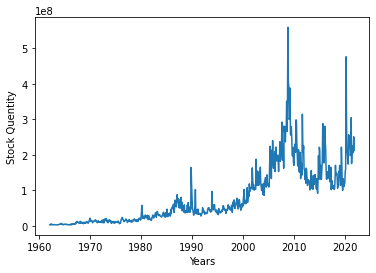

In [25]:


plt.plot(df_data)
plt.xlabel("Years")
plt.ylabel("Stock Quentity")

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df_data).reshape(-1,1))

In [27]:
df

array([[1.26491911e-03],
       [3.23771028e-03],
       [6.04305551e-04],
       [3.08688526e-04],
       [5.61471248e-03],
       [2.97829125e-03],
       [8.45625572e-04],
       [4.68563040e-04],
       [1.57863513e-04],
       [1.03868159e-03],
       [2.15780318e-03],
       [2.22991190e-03],
       [1.28704011e-03],
       [0.00000000e+00],
       [3.13141455e-04],
       [7.38324348e-04],
       [1.24969296e-03],
       [1.20085439e-03],
       [2.87285739e-05],
       [8.33128642e-04],
       [1.01411866e-03],
       [9.39424366e-04],
       [2.75219738e-03],
       [3.25494742e-03],
       [4.59369896e-03],
       [2.82114595e-03],
       [5.05048329e-03],
       [8.32841357e-03],
       [2.62004594e-03],
       [2.65452023e-03],
       [4.14266035e-03],
       [3.30378600e-04],
       [1.44504727e-03],
       [2.91307739e-03],
       [3.53648744e-03],
       [2.20922733e-03],
       [3.79217175e-03],
       [2.53673307e-03],
       [3.68587603e-03],
       [1.99376303e-03],


In [28]:
##splitting dataset into train and test split
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [29]:
print(f'training size is {training_size}')
print(f'test size is {test_size}')

training size is 574
test size is 144


In [30]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train.shape), print(y_train.shape)

(543, 30)
(543,)


(None, None)

In [33]:
print(X_test.shape), print(ytest.shape)

(113, 30)
(113,)


(None, None)

In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 60)            14880     
                                                                 
 lstm_4 (LSTM)               (None, 30, 60)            29040     
                                                                 
 lstm_5 (LSTM)               (None, 60)                29040     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
28/28 [==============================] - 2s 56ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 2/100
28/28 [==============================] - 1s 49ms/step - loss: 0.0012 - val_loss: 0.0084
Epoch 3/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0012 - val_loss: 0.0081
Epoch 4/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 5/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0012 - val_loss: 0.0088
Epoch 6/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0088
Epoch 7/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0086
Epoch 8/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0011 - val_loss: 0.0089
Epoch 9/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0011 - val_loss: 0.0094
Epoch 10/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0011 - val_loss: 0.0101

Epoch 82/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0011 - val_loss: 0.0108
Epoch 83/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0012 - val_loss: 0.0103
Epoch 84/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0011 - val_loss: 0.0110
Epoch 85/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0010 - val_loss: 0.0101
Epoch 86/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0010 - val_loss: 0.0110
Epoch 87/100
28/28 [==============================] - 1s 40ms/step - loss: 9.6930e-04 - val_loss: 0.0124
Epoch 88/100
28/28 [==============================] - 1s 40ms/step - loss: 9.8718e-04 - val_loss: 0.0099
Epoch 89/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0010 - val_loss: 0.0108
Epoch 90/100
28/28 [==============================] - 1s 41ms/step - loss: 9.9039e-04 - val_loss: 0.0129
Epoch 91/100
28/28 [==============================] - 1s 41ms/step - loss: 9.79

In [41]:
from keras.models import load_model
model.save("LSTM_Sock_.h5")

In [43]:
model = load_model("LSTM_Sock_.h5")

In [44]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 18ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

91736497.57066907

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

180175078.03142282

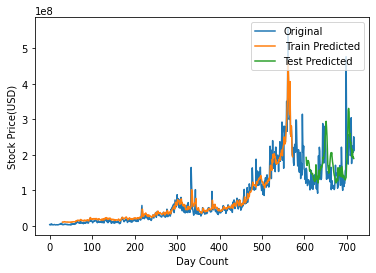

In [51]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# Function add a legend  
plt.legend(["Original", " Train Predicted","Test Predicted"], loc ="upper right")
plt.xlabel("Day Count")
plt.ylabel("Stock Price(USD)")
plt.show()

In [63]:
len(test_data)

144

In [64]:
x_input=test_data[114:].reshape(1,-1)
x_input.shape


(1, 30)

In [65]:
x_input

array([[0.31023646, 0.19854138, 0.17475699, 0.23389602, 0.21674991,
        0.19434342, 0.21089862, 0.21087491, 0.27326781, 0.28057582,
        0.85070694, 0.53996629, 0.36754134, 0.36632684, 0.32190475,
        0.30754513, 0.45648214, 0.44702666, 0.4299091 , 0.39967533,
        0.35076134, 0.36115283, 0.54221969, 0.31058246, 0.3721056 ,
        0.39837393, 0.36538652, 0.37925901, 0.44581198, 0.37636371]])

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [67]:
len(temp_input)

30

In [68]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<10):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.35885492]
31
1 month input [0.19854138 0.17475699 0.23389602 0.21674991 0.19434342 0.21089862
 0.21087491 0.27326781 0.28057582 0.85070694 0.53996629 0.36754134
 0.36632684 0.32190475 0.30754513 0.45648214 0.44702666 0.4299091
 0.39967533 0.35076134 0.36115283 0.54221969 0.31058246 0.3721056
 0.39837393 0.36538652 0.37925901 0.44581198 0.37636371 0.35885492]
1 month output [[0.3689125]]
2 month input [0.17475699 0.23389602 0.21674991 0.19434342 0.21089862 0.21087491
 0.27326781 0.28057582 0.85070694 0.53996629 0.36754134 0.36632684
 0.32190475 0.30754513 0.45648214 0.44702666 0.4299091  0.39967533
 0.35076134 0.36115283 0.54221969 0.31058246 0.3721056  0.39837393
 0.36538652 0.37925901 0.44581198 0.37636371 0.35885492 0.36891249]
2 month output [[0.38128236]]
3 month input [0.23389602 0.21674991 0.19434342 0.21089862 0.21087491 0.27326781
 0.28057582 0.85070694 0.53996629 0.36754134 0.36632684 0.32190475
 0.30754513 0.45648214 0.44702666 0.4299091  0.39967533 0.35076134
 0.36115283 

In [69]:
day_new=np.arange(1,21)
day_pred=np.arange(21,31)

In [71]:
len(df)

718

In [73]:
plt.plot(day_new,scaler.inverse_transform(df[698:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(["Previous ", "Predicted"], loc ="upper right")
plt.xlabel("Day Count")
plt.ylabel("Stock count)")

Text(0, 0.5, 'Stock count)')